# Student Information

# Setup necessary libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from PIL import Image
from scipy import ndimage
%matplotlib inline

# Setup basic operators



Menu for users   
Chương trình 'main' cho phép người dùng nhập vào tên tập tin ảnh mỗi lần chương trình thực thi

In [2]:
# main menu
print("1.Transform Color")
print("\t1.1 RGB image to Grayscale image")
print("\t1.2 RGB image to HSV image\n")

print("2.Transform Geometry")
print("\t2.1 Reduce quality of a RGB image")
print("\t2.2 Image Rotation\n")

print("3.Algorithm to smooth the image")
print("\t3.1 Image blurring (Smoothing Image)\n")

print("4.Edge detection")
print("\t4.1 Edge detection by Sobel Edge Detection")
print("\t4.2 Edge detection by Canny Edge Detection")

1.Transform Color
	1.1 RGB image to Grayscale image
	1.2 RGB image to HSV image

2.Transform Geometry
	2.1 Reduce quality of a RGB image
	2.2 Image Rotation

3.Algorithm to smooth the image
	3.1 Image blurring (Smoothing Image)

4.Edge detection
	4.1 Edge detection by Sobel Edge Detection
	4.2 Edge detection by Canny Edge Detection


In [3]:
# Đọc hiển thị bức ảnh đầu vào
image_path = str(input('Enter image file name (including image format, for example: Lenna.png): '))

# hiển thị thông tin ảnh
print('\nInput:\n', '-Image file name: ' + image_path + '\n')

Enter image file name (including image format, for example: Lenna.png): Lenna.png

Input:
 -Image file name: Lenna.png



(512, 512, 3)

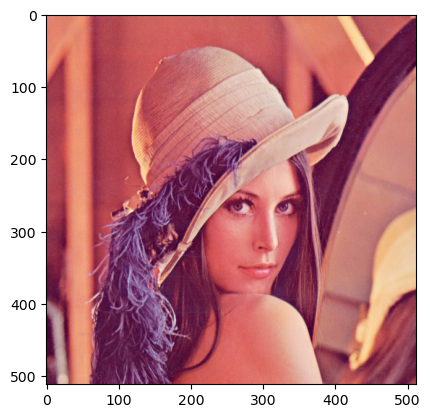

In [4]:
# image_path = 'Lenna.png'

#used for numpy library
image_np = Image.open(image_path) 

# used for OpenCV: cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R, vì vậy khi hiển thị sẽ bị sai màu
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
# sau đó ta sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img_origin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_origin)

# đọc thông tin của bức ảnh trên, w x h x c 
img_origin.shape

# 1. Transform Color

## 1.1 Tranform RGB image to Grayscale image

### 1.1.1 RGB to Grayscale by OpenCV library

In [5]:
def RGB2Gray_opencv(img_path):
    result = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return result
    
img_gray = RGB2Gray_opencv(image_path)
# plt.imshow(img_gray, cmap='gray')
# plt.title("RGB to Greyscale image by OpenCV");

### 1.1.2 RGB to Grayscale by self-setting algorithm

In [6]:
def to_grayscale(image):         
    weights = np.c_[0.3, 0.59 , 0.11]
                    #red  green  blue
    tile = np.tile(weights, reps = (image.shape[0], image.shape[1], 1))
    return np.sum(tile * image, axis = 2)

def RGB2Greyscale(image):
    RGB_list = np.array(image)
    #width, height, bit = np.shape(C_list)
    
    Gray_list = to_grayscale(RGB_list)
    result = Image.fromarray(Gray_list.astype(np.uint8))
    
    return result


img_gray2 = RGB2Greyscale(image_np)
# plt.imshow(img_gray2, cmap='gray')
# plt.title("RGB to Greyscale image");

Compare 2 Grayscale images by OpenCv and by self-setting algorithm

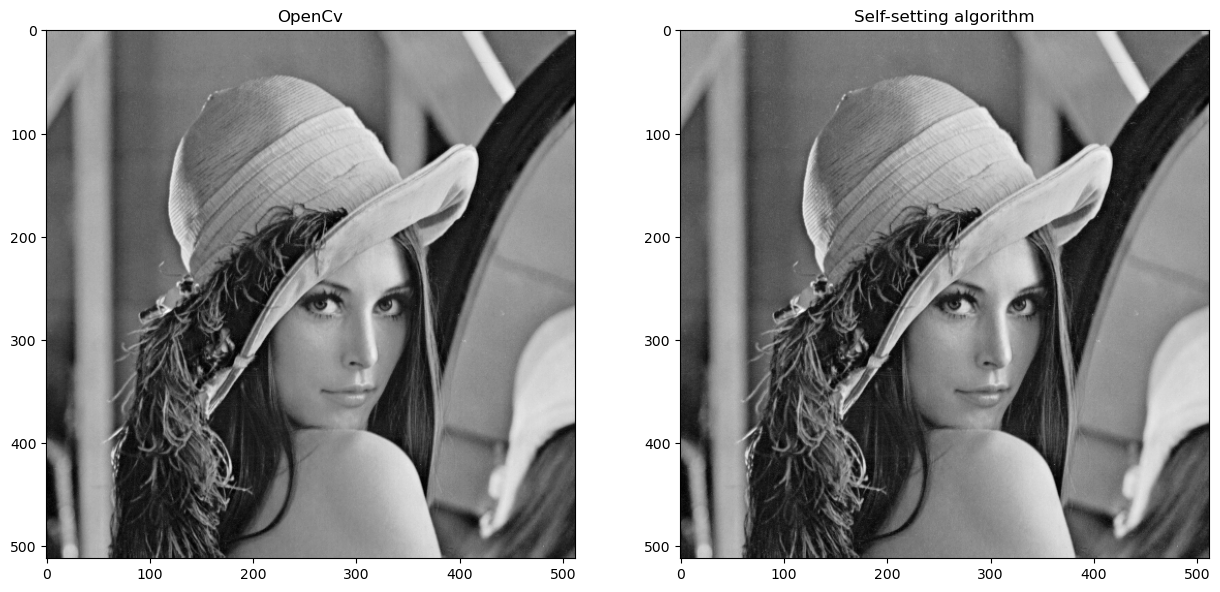

In [7]:
fig = plt.figure(figsize = (15, 15))

fig.add_subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("OpenCv")

fig.add_subplot(1, 2, 2)
plt.imshow(img_gray2, cmap='gray')
plt.title("Self-setting algorithm");

## 1.2 Transform RGB image to HSV image

### 1.2.1 RGB to HSV by OpenCV

In [8]:
def RGB2HSV_opencv(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    return result

image_hsv = RGB2HSV_opencv(img)

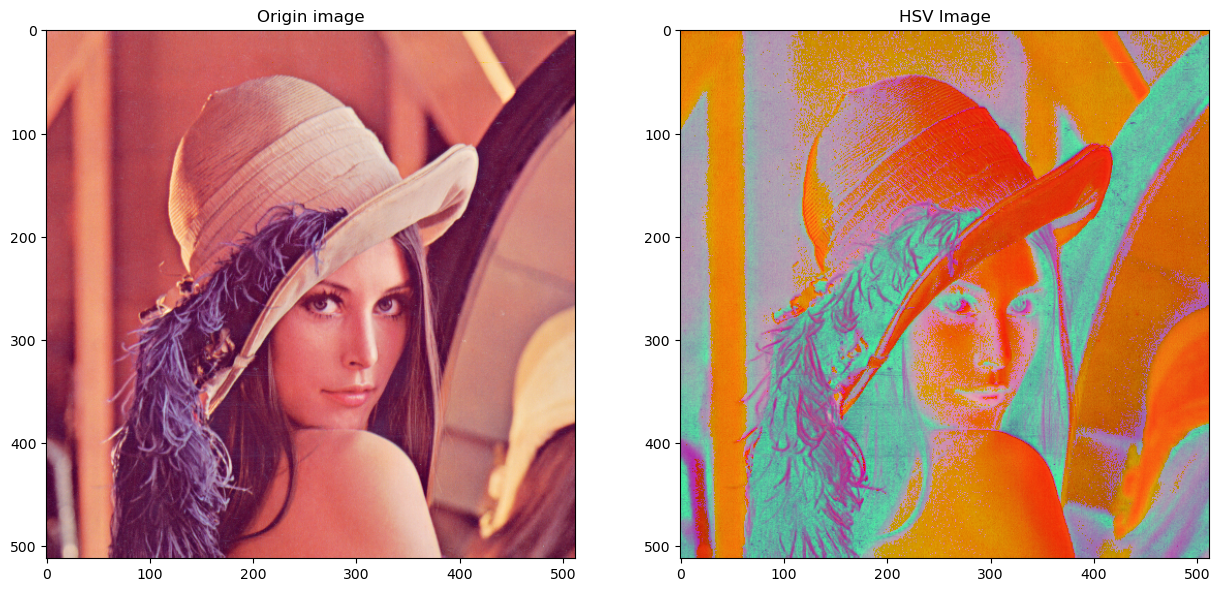

In [9]:
fig = plt.figure(figsize = (15, 15))

fig.add_subplot(1, 2, 1)
plt.imshow(img_origin)
plt.title("Origin image")

fig.add_subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title("HSV Image");

# 2. Transform Geometry

## 2.1 Reduce quality of a RGB image

### 2.1.1 Reduce image quality by OpenCV library

In [10]:
def reduceImageSize_opencv(image):
    result = cv2.resize(image, dsize=None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR) # INTER_LINEAR – Linear interpolation.
    return result

half_sized = reduceImageSize_opencv(img_origin)

### 2.1.2 Reduce image quality by self-setting algorithm

In [11]:
def reduceImageSize(image, new_width, new_height):
    width, height = image.size;
    asp_rat = width/height;
    new_rat = new_width/new_height;

    if (new_rat == asp_rat):
        result = image.resize((new_width, new_height), Image.Resampling.BICUBIC); 

    # adjusts the height to match the width
    else:
        new_height = round(new_width / asp_rat);
        result = image.resize((new_width, new_height), Image.Resampling.BICUBIC);
    return result

# Enter new width (in pixels)
new_w = 256;
# Enter new height (in pixels)
new_h = 256;

half_size2 = reduceImageSize(image_np, new_w, new_h)
# plt.imshow(half_size2);

Image after desized by half: (256, 256, 3)


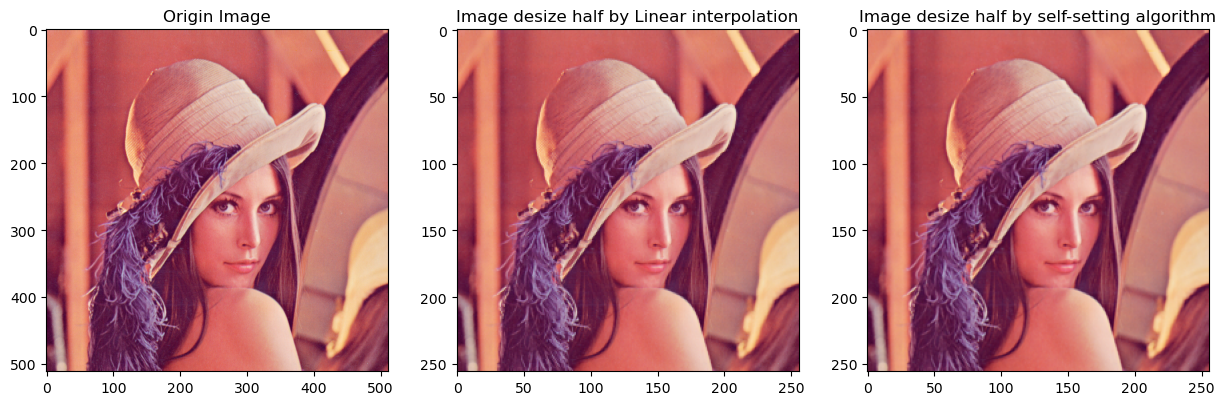

In [12]:
fig = plt.figure(figsize = (15, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(img_origin)
plt.title("Origin Image")

fig.add_subplot(1, 3, 2)
plt.imshow(half_sized)
plt.title("Image desize half by Linear interpolation")

fig.add_subplot(1, 3, 3)
plt.imshow(half_size2);
plt.title("Image desize half by self-setting algorithm")
print('Image after desized by half:', half_sized.shape)

## 2.2 Image Rotation

### 2.2.1 Image Rotation by OpenCV

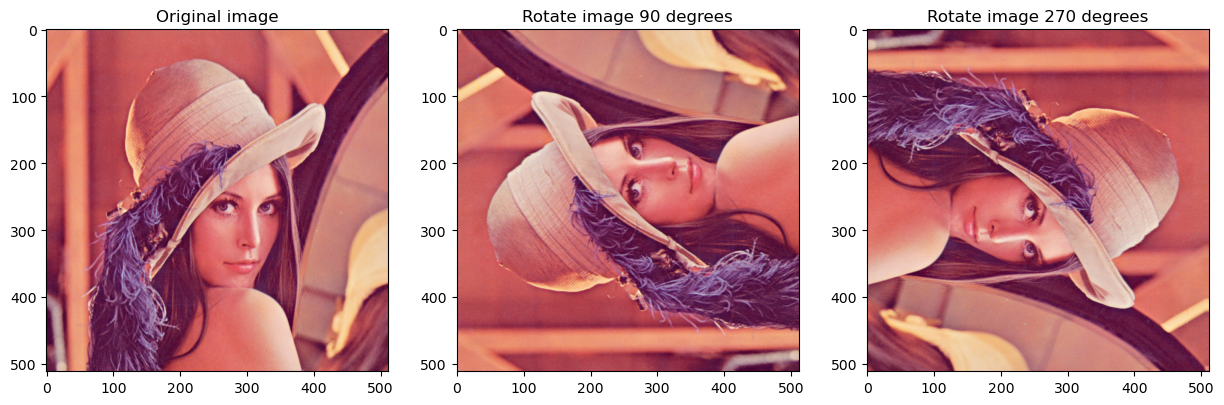

In [13]:
def imageRotation_opencv(image, degrees):
    rows = img_origin.shape[0]
    cols = img_origin.shape[1]

    # cols-1 and rows-1 are the coordinate limits.
    R = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), degrees, 1)
    dst = cv2.warpAffine(img_origin, R, (cols, rows))
    return dst
    
dst_1 = imageRotation_opencv(img_origin, 90)
dst_2 = imageRotation_opencv(img_origin, 270)

# print out
fig = plt.figure(figsize = (15, 15))

# in ra ảnh gốc
fig.add_subplot(1, 3, 1)
plt.imshow(img_origin)
plt.title("Original image")

# in ra ảnh được xử lí xoay ảnh 90 độ
fig.add_subplot(1, 3, 2)
plt.imshow(dst_1)
plt.title("Rotate image 90 degrees")

# in ra ảnh sau khi được xử lí xoay ảnh 270 độ
fig.add_subplot(1, 3, 3)
plt.imshow(dst_2)
plt.title("Rotate image 270 degrees");

# 3. Algorithm to smooth the image

## 3.1 Image blurring

### 3.1.1 Image blurring by OpenCV

In [14]:
def GaussianBlur_opencv(image, sigmaX, sigmaY):
    dst = cv2.GaussianBlur(image,(sigmaX, sigmaY),cv2.BORDER_DEFAULT)
    return dst

(sigmaX, sigmaY) = (3, 3)
dst_1 = GaussianBlur_opencv(img_origin, sigmaX, sigmaY)
(sigmaX, sigmaY) = (7, 7)
dst_2 = GaussianBlur_opencv(img_origin, sigmaX, sigmaY)

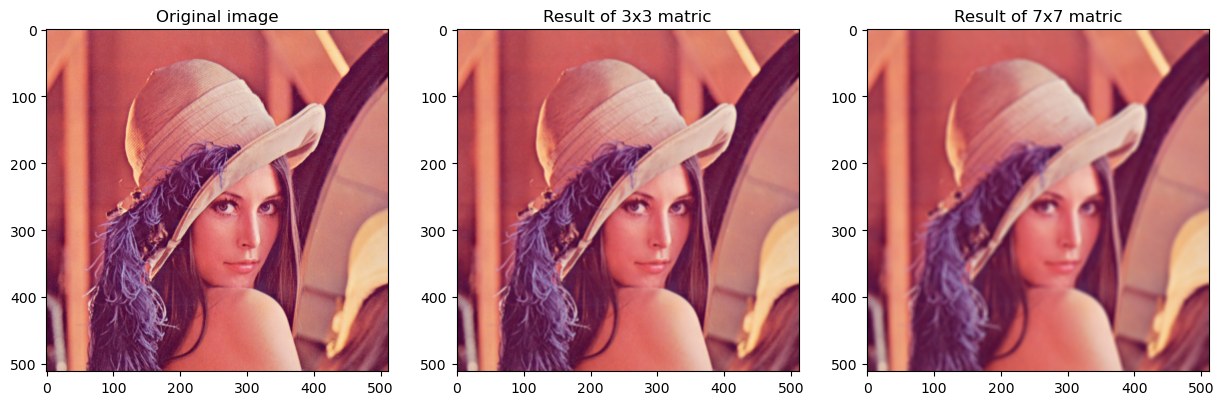

In [15]:
# print out
fig = plt.figure(figsize = (15, 15))

# in ra ảnh gốc
fig.add_subplot(1, 3, 1)
plt.imshow(img_origin)
plt.title("Original image")

# in ra ảnh được xử lí trong ma trận 3x3
fig.add_subplot(1, 3, 2)
plt.imshow(dst_1)
plt.title("Result of 3x3 matric")

# in ra ảnh sau khi được xử lí trong ma trận 7x7
fig.add_subplot(1, 3, 3)
plt.imshow(dst_2)
plt.title("Result of 7x7 matric");

### 3.1.2 Image blurring by Gaussian self-setting algorithm

In [16]:
def blurImage(image):
    G_list = np.array(image)

    width, height, bit = np.shape(G_list)

    Gaussian = np.array([[[1], [2], [1]],
                       [[2], [4], [2]],
                       [[1], [2], [1]]]) / 16

    temp = np.zeros((width + 2, height + 2, bit))
    temp[1:-1,1:-1,:] = G_list

    for a in range(0, width):
        for b in range(0, height):
            G_list[a][b] = (temp[a:a+3, b:b+3] * Gaussian).sum(axis=1).sum(axis=0)

    return Image.fromarray(G_list.astype(np.uint8))

image_blur=blurImage(image_np)
# plt.imshow(image_blur);

Text(0.5, 1.0, 'Result of 3x3 matric by OpenCV')

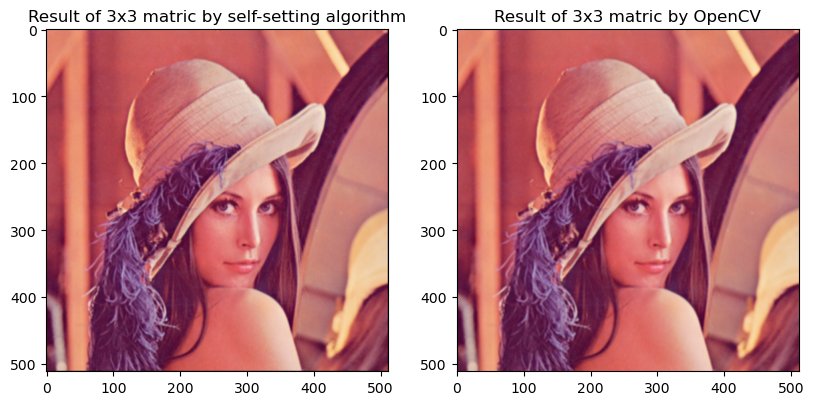

In [17]:
# print out
fig = plt.figure(figsize = (15, 15))

# in ra ảnh gốc
fig.add_subplot(1, 3, 1)
plt.imshow(image_blur)
plt.title("Result of 3x3 matric by self-setting algorithm")

# in ra ảnh được xử lí trong ma trận 3x3
fig.add_subplot(1, 3, 2)
plt.imshow(dst_1)
plt.title("Result of 3x3 matric by OpenCV")

# 4. Edge detection

## 4.1 Edge detection by Sobel Edge Detection

### 4.1.1 Sobel Edge Detection by OpenCV

Use graycsale image for edge detection

In [18]:
img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Use image blurring for better edge detection

In [19]:
img_gray_blur = cv2.GaussianBlur(img_gray,(3,3),cv2.BORDER_DEFAULT)

Setting parameters for 

In [20]:
ddepth=cv2.CV_64F # 64-bit float output
src=img_gray_blur
ksize = 5

Sobel Edge Detection

In [21]:
def SobelDetection(dx, dy):
    sobel = cv2.Sobel(src, ddepth, dx, dy, ksize)
    return sobel

Sobel Edge Detection on the X axis

In [22]:
dx = 1  # đạo hàm bậc 1 theo x
dy = 0  # không đạo hàm theo y
sobel_x = SobelDetection(dx, dy) 

Sobel Edge Detection on the Y axis

In [23]:
dx = 0  # đạo hàm bậc 1 theo x
dy = 1  # không đạo hàm theo y
sobel_y = SobelDetection(dx, dy) 

Combined X and Y Sobel Edge Detection

In [24]:
dx = 1  # đạo hàm bậc 1 theo x
dy = 1  # không đạo hàm theo y
sobel_xy = SobelDetection(dx, dy) 

Compared 3 Sobel edge images, with edge enchanced in 3 types of direction: X-direction, Y-direction and XY-direction

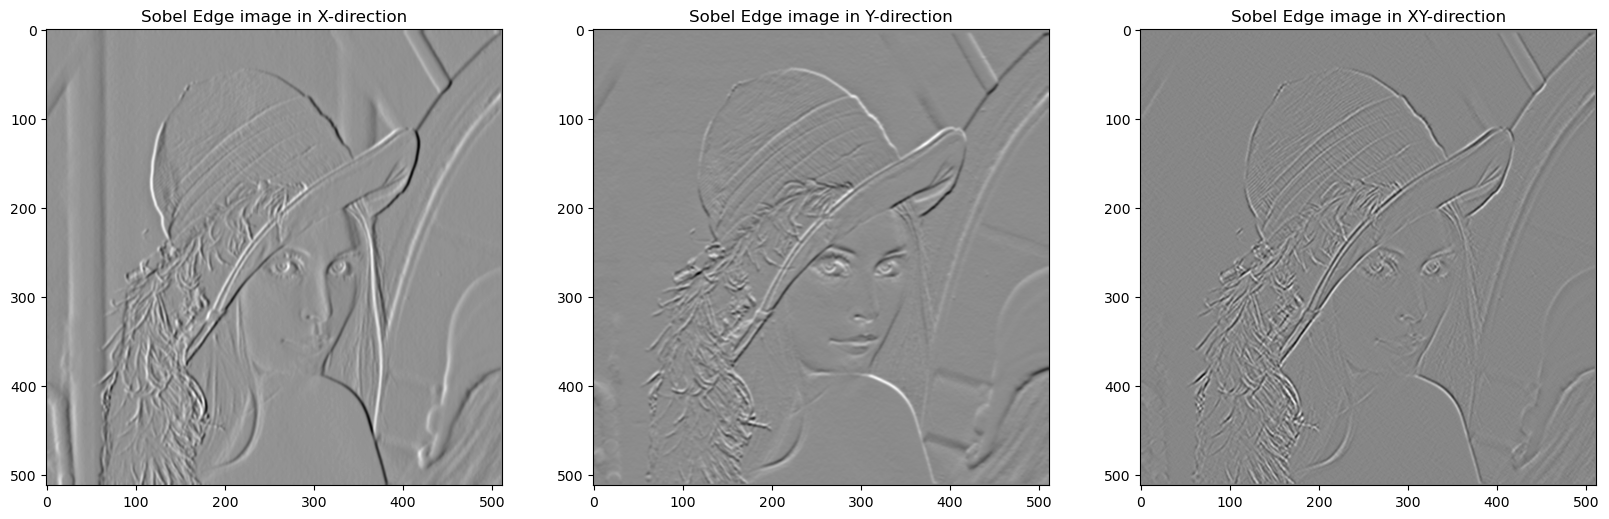

In [25]:
fig = plt.figure(figsize = (20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel Edge image in X-direction")

fig.add_subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Edge image in Y-direction")

fig.add_subplot(1, 3, 3)
plt.imshow(sobel_xy, cmap='gray')
plt.title("Sobel Edge image in XY-direction");

## 4.2 Edge detection by Canny Edge Detection

### 4.2.1 Canny Edge Detection by OpenCV

Use the previous Blurred Grayscale image

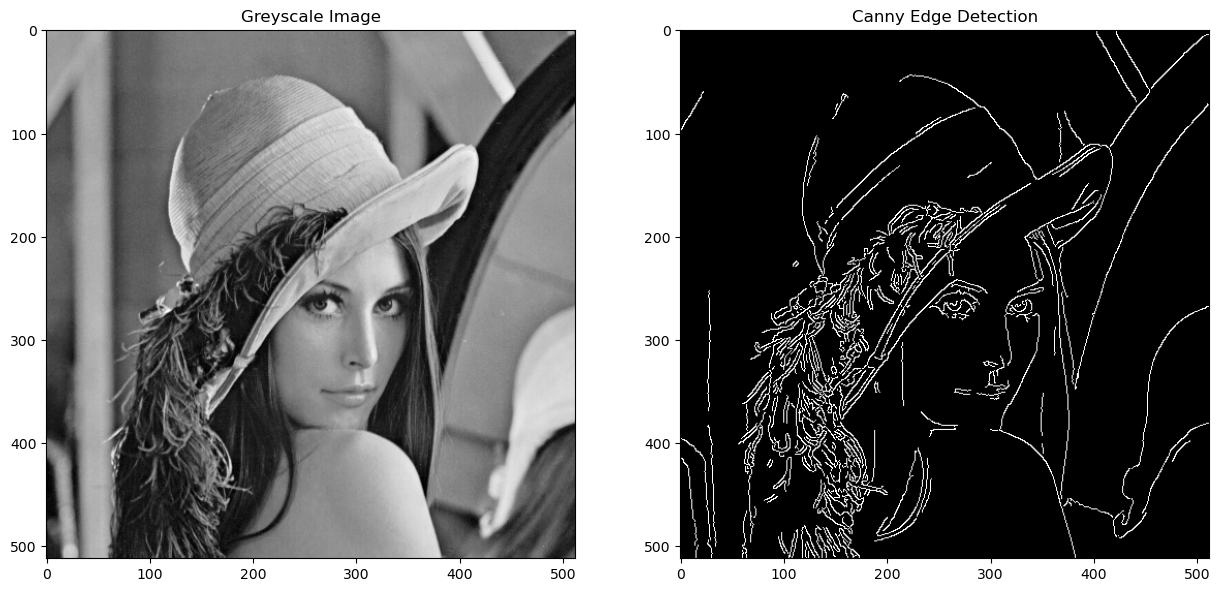

In [26]:
def CannyEdgeDetect(threshold1, threshold2):
    edges = cv2.Canny(img_gray_blur, threshold1, threshold2)
    return edges

threshold1 = 70
threshold2 = 130
canny_edges = CannyEdgeDetect(threshold1, threshold2)

fig = plt.figure(figsize = (15, 15))
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Greyscale Image")

fig.add_subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection");

### 4.2.1 Canny Edge Detection by self-setting algorithm

#### Noise Reduction:

##### a) Detemine gradient function for Gx and Gy using 3x3 Sobel filter

In [27]:
def Sobel_filter(img, dimension):
    if (dimension == 'x'):
        grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],
                                                   [-2, 0, 2],
                                                   [-1, 0, 1]]
                                                 ))
    if (dimension == 'y'):
        grad_img = ndimage.convolve(img, np.array([[-1,-2,-1],
                                                   [ 0, 0, 0],
                                                   [ 1, 2, 1]]
                                                 ))
    return grad_img/np.max(grad_img)

###### b) Define gradient magnitude function

In [28]:
def Normalize(Gx, Gy):
    grad_mag = np.hypot(Gx, Gy)
    return grad_mag/np.max(grad_mag)

#### Finding Intensity Gradient of the Image:

##### a) Find closest direction D*

In [29]:
def closest_dir_function(grad_dir) :
    x_grad_dir = int(grad_dir.shape[0] - 1)
    y_grad_dir = int(grad_dir.shape[1] - 1)
    #x_grad_dir and y_grad_dir are the gradient dimension limits.
    
    closest_dir_arr = np.zeros(grad_dir.shape)
    
    for i in range(1, x_grad_dir) :
        for j in range(1, y_grad_dir) :
            if((grad_dir[i, j] > -23 and grad_dir[i, j] <= 23) or 
               (grad_dir[i, j] <= -160 and grad_dir[i, j] > 160)) :
                closest_dir_arr[i, j] = 0
                
            elif((grad_dir[i, j] > 23 and grad_dir[i, j] <= 68) or 
                 (grad_dir[i, j] <= -120 and grad_dir[i, j] > -160)) :
                closest_dir_arr[i, j] = 45
                
            elif((grad_dir[i, j] > 68 and grad_dir[i, j] <= 120) or 
                 (grad_dir[i, j] <= -68 and grad_dir[i, j] > -120)) : 
                closest_dir_arr[i, j] = 90
                
            else:
                closest_dir_arr[i, j] = 135
                
    return closest_dir_arr

##### b) Convert to thinned edge

In [30]:
def non_maximal_suppressor(grad_mag, closest_dir) :
    
    x_grad_mag = int(grad_mag.shape[0] - 1)
    y_grad_mag = int(grad_mag.shape[1] - 1)
    #x_grad_dir and y_grad_dir are the gradient magnitude limits.
    
    thinned_output = np.zeros(grad_mag.shape)
    
    for i in range(1, x_grad_mag) :
        for j in range(1, y_grad_mag) :
            
            if(closest_dir[i, j] == 0) :
                if((grad_mag[i, j] > grad_mag[i, j+1]) and 
                   (grad_mag[i, j] > grad_mag[i, j-1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            elif(closest_dir[i, j] == 45) :
                if((grad_mag[i, j] > grad_mag[i+1, j+1]) and 
                   (grad_mag[i, j] > grad_mag[i-1, j-1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            elif(closest_dir[i, j] == 90) :
                if((grad_mag[i, j] > grad_mag[i+1, j]) and 
                   (grad_mag[i, j] > grad_mag[i-1, j])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            else :
                if((grad_mag[i, j] > grad_mag[i+1, j-1]) and 
                   (grad_mag[i, j] > grad_mag[i-1, j+1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
    return thinned_output/np.max(thinned_output)

#### Non-maximum Suppression

##### a) Function to include weak pixels that are connected to chain of strong pixels

In [31]:
def DFS(img) :
    x_img_dim = int(img.shape[0] - 1)
    y_img_dim = int(img.shape[1] - 1)
    
    for i in range(1, x_img_dim) :
        for j in range(1, y_img_dim) :
            if(img[i, j] == 1) :
                t_max = max(img[i-1, j-1], 
                            img[i-1, j  ], 
                            img[i-1, j+1], 
                            img[i  , j-1],
                            img[i  , j+1], 
                            img[i+1, j-1], 
                            img[i+1, j  ], 
                            img[i+1, j+1])
                if(t_max == 2) :
                    img[i, j] = 2

#### Hysteresis Thresholding

In [32]:
def hysteresis_thresholding(img) :
#     low_ratio = 0.10
#     high_ratio = 0.30
    low_ratio = 0.10
    high_ratio = 0.30
    diff = np.max(img) - np.min(img)
    t_low = np.min(img) + low_ratio * diff
    t_high = np.min(img) + high_ratio * diff
    
    temp_img = np.copy(img)
    
    x_img_dim = int(img.shape[0] - 1)
    y_img_dim = int(img.shape[1] - 1)
    
    #Assign values to pixels
    for i in range(1, x_img_dim) :
        for j in range(1, y_img_dim) :
            
            if(img[i, j] > t_high) : # then Strong pixels
                temp_img[i, j] = 2
            
            elif(img[i, j] < t_low) :# then Weak pixels
                temp_img[i, j] = 0
            
            else :                   # then Intermediate pixels
                temp_img[i, j] = 1
    
    #Include weak pixels that are connected to chain of strong pixels 
    total_strong = np.sum(temp_img == 2)
    while(1) :
        DFS(temp_img)
        if(total_strong == np.sum(temp_img == 2)) :
            break
        total_strong = np.sum(temp_img == 2)
    
    #Remove weak pixels
    for i in range(1, int(temp_img.shape[0] - 1)) :
        for j in range(1, int(temp_img.shape[1] - 1)) :
            if(temp_img[i, j] == 1) :
                temp_img[i, j] = 0
    
    return temp_img/np.max(temp_img)

**Canny Edge Detector Implementation**

In [33]:
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.3, 0.59, 0.11])

In [34]:
input_img = imageio.imread(image_path)
print("Image shape: ", input_img.shape)

#Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

#Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 0.5)
# plt.imshow(blur_img, cmap = plt.get_cmap('gray'));

Image shape:  (512, 512, 3)


In [35]:
#Find gradient Fx
x_grad = Sobel_filter(blur_img, 'x')

#Find gradient Fy
y_grad = Sobel_filter(blur_img, 'y')
print(x_grad, '\n')
print(y_grad)

[[ 1.56031445e-05  8.93865598e-04  5.83950155e-03 ...  1.12005228e-01
   2.38836228e-01  1.45281085e-01]
 [ 1.56031445e-05  8.93865598e-04  5.83950155e-03 ...  1.12005228e-01
   2.38836228e-01  1.45281085e-01]
 [ 1.58914191e-05  8.96335236e-04  5.84215618e-03 ...  1.12012972e-01
   2.38838827e-01  1.45281054e-01]
 ...
 [-4.79137156e-03 -3.86876722e-02 -3.05870426e-02 ... -5.87557983e-03
   1.51007355e-02  4.01803088e-03]
 [-6.60393166e-03 -5.32888993e-02 -4.00062173e-02 ... -1.83341865e-02
  -1.12029723e-02 -8.39402444e-03]
 [-7.21632305e-03 -5.83558312e-02 -4.38280391e-02 ... -2.44298552e-02
  -2.57305214e-02 -1.52288060e-02]] 

[[-1.98558669e-16 -9.92793346e-17  0.00000000e+00 ...  0.00000000e+00
  -9.92793346e-17  9.92793346e-17]
 [-1.98558669e-16 -9.92793346e-17  0.00000000e+00 ...  0.00000000e+00
  -9.92793346e-17  9.92793346e-17]
 [-3.09356710e-06 -9.31514147e-08  5.48168553e-06 ...  8.04987275e-05
   9.17505208e-05  9.45436992e-05]
 ...
 [ 1.74107299e-02  5.14417583e-03 -1.22694

Compute edge strength

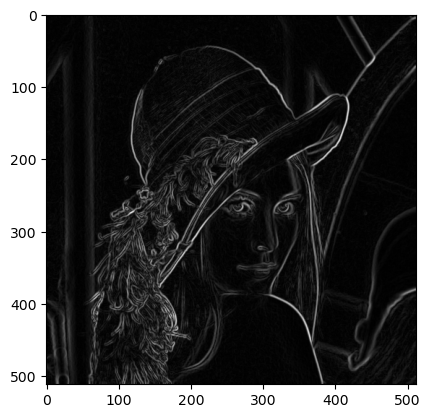

In [36]:
grad_mag = Normalize(x_grad, y_grad)
plt.imshow(grad_mag, cmap = plt.get_cmap('gray'));

Compute direction of gradient

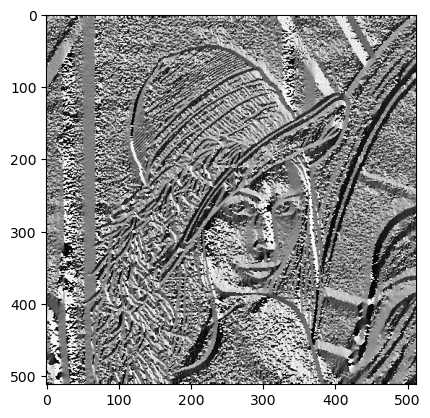

In [37]:
grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
plt.imshow(grad_dir, cmap = plt.get_cmap('gray'));

Non maximal suppression

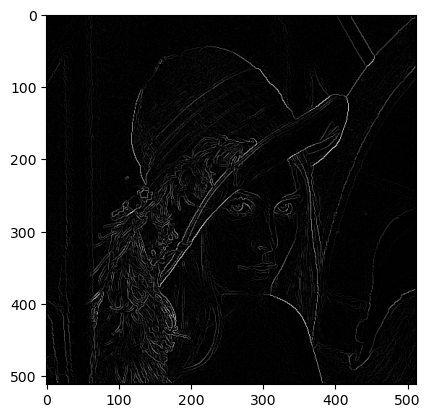

In [38]:
closest_dir = closest_dir_function(grad_dir)
thinned_output = non_maximal_suppressor(grad_mag, closest_dir)
plt.imshow(thinned_output, cmap = plt.get_cmap('gray'));

Hysteresis Thresholding

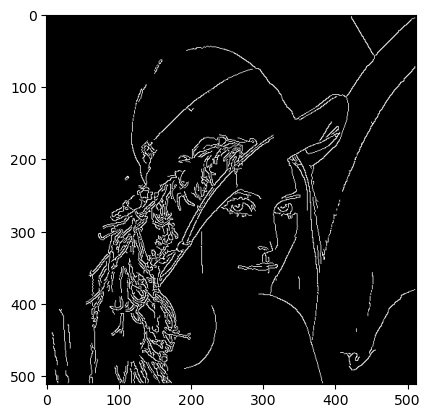

In [39]:
output_img = hysteresis_thresholding(thinned_output)
plt.imshow(output_img, cmap = plt.get_cmap('gray'));